In [ ]:
!pip install geopandas

In [52]:
!pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 2.3 MB/s eta 0:00:00 0:00:01


In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
import json

In [23]:
listing = pd.read_csv("/Users/julius/Personal/Personal_Project/airbnb/AirBnB-Listing-Analysis/Dataset/listings_cleansed50.csv",encoding = 'unicode_escape')

In [24]:
listing

,id,host_id,host_name,host_since,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,...,availability_365,number_of_reviews,availability_eoy,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,instant_bookable,reviews_per_month
0,10803,38901,Lindsay,16/9/2009,92%,t,1.0,1.0,Moreland,-37.766060,...,327,199,266,120,6600.0,12/1/2013,10/2/2025,4.56,f,1.35
1,12936,50121,The A2C Team,31/10/2009,NaN,f,10.0,20.0,Port Phillip,-37.859990,...,0,42,0,0,NaN,4/8/2010,15/3/2020,4.68,f,0.24
2,41836,182833,Diana,27/7/2010,NaN,f,3.0,3.0,Darebin,-37.697610,...,0,157,0,0,NaN,16/11/2010,22/8/2018,4.71,f,0.90
3,43429,189684,Allan,3/8/2010,99%,t,6.0,37.0,Monash,-37.899830,...,293,265,232,60,8340.0,5/12/2010,9/1/2025,4.88,f,1.53
4,44082,193031,Vicki,6/8/2010,100%,t,8.0,11.0,Frankston,-38.147680,...,166,63,166,60,4740.0,11/2/2011,5/1/2025,4.98,f,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25941,1367582130991298232,681677523,Nguyen P T,1/3/2025,NaN,f,1.0,1.0,Brimbank,-37.736823,...,178,0,178,0,0.0,NaN,NaN,NaN,f,NaN
25942,1367723155220552415,681821849,Nancy,1/3/2025,NaN,f,1.0,1.0,Melbourne,-37.810320,...,365,0,304,0,0.0,NaN,NaN,NaN,f,NaN
25943,1367760836083218543,678636091,Shafeeq A,13/2/2025,NaN,f,1.0,1.0,Melbourne,-37.826099,...,165,0,165,0,0.0,NaN,NaN,NaN,f,NaN
25944,1367812657120592009,556374414,Wooi,14/1/2024,91%,f,51.0,57.0,Maribyrnong,-37.788330,...,354,0,293,0,0.0,NaN,NaN,NaN,t,NaN


In [25]:
listing.isnull().sum()

id                              0
host_id                         0
host_name                      10
host_since                     10
host_acceptance_rate         6761
host_is_superhost             975
host_listings_count            10
host_total_listings_count      10
neighbourhood_cleansed          0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
price                        7319
minimum_nights                  0
maximum_nights                  0
has_availability              973
availability_365                0
number_of_reviews               0
availability_eoy                0
estimated_occupancy_l365d       0
estimated_revenue_l365d      7319
first_review                 4857
last_review                  4857
review_scores_rating         4857
instant_bookable                0
reviews_per_month            4857
dtype: int64

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.0/338.0 kB 6.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 6.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.6 MB/s eta 0:00:00a 0:00:01


## EDA

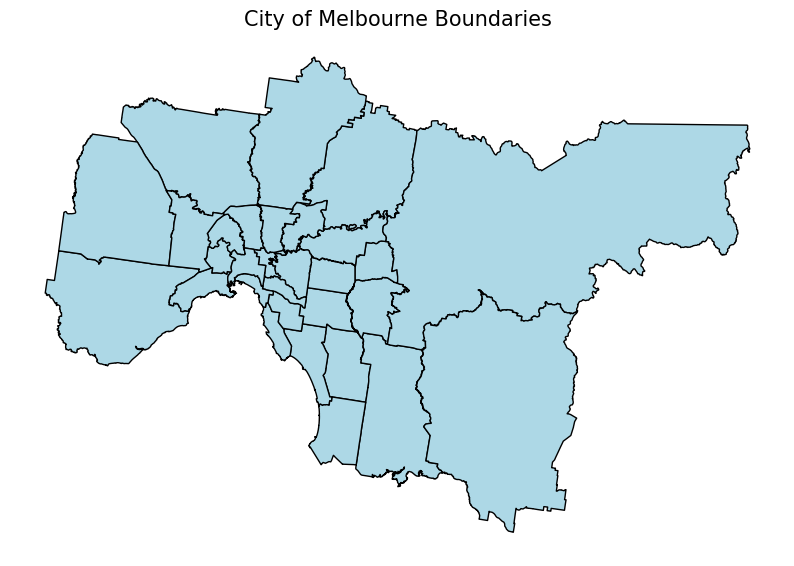

In [10]:
import matplotlib.pyplot as plt

# Read the GeoJSON
gdf = gpd.read_file('/Users/julius/Personal/Personal_Project/airbnb/AirBnB-Listing-Analysis/Dataset/neighbourhoods.geojson')

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='lightblue', edgecolor='black')

# Add title
plt.title("City of Melbourne Boundaries", fontsize=15)
plt.axis('off')
plt.show()

In [134]:
Melbourne_suburbs = listing.groupby('neighbourhood_cleansed').size().reset_index(name='listing_count')

In [137]:
with open ("/Users/julius/Personal/Personal_Project/airbnb/AirBnB-Listing-Analysis/Dataset/neighbourhoods.geojson") as f:
    geojson_data = json.load(f)

m = folium.Map(location=[-37.8136, 144.9631], zoom_start=11)

In [140]:
folium.Choropleth(
    geo_data=geojson_data,
    name='choropleth',
    data=Melbourne_suburbs,
    columns=['neighbourhood_cleansed', 'listing_count'],
    key_on='feature.properties.name',  # adjust to match GeoJSON key
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Listings',
    highlight=True
).add_to(m)

# # Optional: add tooltip
# folium.LayerControl().add_to(m)


ValueError: key_on `'properties.name'` not found in GeoJSON.

In [29]:
listing.describe(include = 'all')

,id,host_id,host_name,host_since,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,...,availability_365,number_of_reviews,availability_eoy,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,instant_bookable,reviews_per_month
count,2.594600e+04,2.594600e+04,25936,25936,19185,24971,25936.000000,25936.000000,25946,25946.000000,...,25946.000000,25946.000000,25946.000000,25946.000000,1.862700e+04,21089,21089,21089.000000,25946,21089.000000
unique,NaN,NaN,6057,4473,99,2,NaN,NaN,30,NaN,...,NaN,NaN,NaN,NaN,NaN,3537,2307,NaN,2,NaN
top,NaN,NaN,Flexistayz,19/8/2016,100%,f,NaN,NaN,Melbourne,NaN,...,NaN,NaN,NaN,NaN,NaN,29/9/2024,15/2/2025,NaN,f,NaN
freq,NaN,NaN,311,316,6133,17728,NaN,NaN,8237,NaN,...,NaN,NaN,NaN,NaN,NaN,78,649,NaN,19066,NaN
mean,6.159676e+17,1.998135e+08,NaN,NaN,NaN,NaN,27.907966,41.993291,NaN,-37.827676,...,150.310761,35.343521,131.952324,55.584213,1.412657e+04,NaN,NaN,4.723969,NaN,1.397017
std,5.391520e+17,1.931304e+08,NaN,NaN,NaN,NaN,95.738465,132.086963,NaN,0.077818,...,136.088211,69.453384,114.994425,76.661169,2.858336e+04,NaN,NaN,0.423702,NaN,1.606440
min,1.080300e+04,1.878500e+04,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,-38.285260,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,1.000000,NaN,0.010000
25%,3.172432e+07,3.676103e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,-37.853381,...,0.000000,1.000000,0.000000,0.000000,8.160000e+02,NaN,NaN,4.650000,NaN,0.280000
50%,7.719036e+17,1.250861e+08,NaN,NaN,NaN,NaN,2.000000,3.000000,NaN,-37.818190,...,119.000000,9.000000,112.000000,18.000000,6.426000e+03,NaN,NaN,4.850000,NaN,0.920000
75%,1.120670e+18,3.424077e+08,NaN,NaN,NaN,NaN,13.000000,19.000000,NaN,-37.801193,...,289.000000,38.000000,256.000000,84.000000,1.980000e+04,NaN,NaN,5.000000,NaN,1.990000


In [30]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25946 entries, 0 to 25945
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         25946 non-null  int64  
 1   host_id                    25946 non-null  int64  
 2   host_name                  25936 non-null  object 
 3   host_since                 25936 non-null  object 
 4   host_acceptance_rate       19185 non-null  object 
 5   host_is_superhost          24971 non-null  object 
 6   host_listings_count        25936 non-null  float64
 7   host_total_listings_count  25936 non-null  float64
 8   neighbourhood_cleansed     25946 non-null  object 
 9   latitude                   25946 non-null  float64
 10  longitude                  25946 non-null  float64
 11  property_type              25946 non-null  object 
 12  room_type                  25946 non-null  object 
 13  accommodates               25946 non-null  int

In [130]:
listing['price'] = listing['price'].replace('[\$,]', '', regex=True).astype(float)

listing['availability_365'] = pd.to_numeric(listing['availability_365'], errors='coerce')

In [132]:
# Estimated annual revenue = price × availability
listing['estimated_revenue'] = listing['price'] * listing['availability_365']


# Group by suburb and calculate average revenue
revenue_table = listing.groupby('neighbourhood_cleansed').agg(
    avg_revenue=('estimated_revenue', 'mean'),
    listing_count=('id', 'count')
).reset_index()

# Round for cleaner view
revenue_table['avg_revenue'] = revenue_table['avg_revenue'].round(2)


In [133]:
revenue_table

,neighbourhood_cleansed,avg_revenue,listing_count
0,Banyule,41126.67,220
1,Bayside,91388.47,439
2,Boroondara,133042.69,653
3,Brimbank,39253.97,337
4,Cardinia,54952.41,227
5,Casey,46596.10,349
6,Darebin,31085.24,598
7,Frankston,51062.15,290
8,Glen Eira,49383.55,559
9,Greater Dandenong,38333.93,207


In [125]:
listing['review_scores_rating'] = pd.to_numeric(listing['review_scores_rating'], errors='coerce')

In [128]:
listing_summary_table = listing.groupby('neighbourhood_cleansed').agg(
    listings_count=('id', 'count'),
    avg_rating=('review_scores_rating', 'mean')
).reset_index()

listing_summary_table = listing_summary_table.sort_values(by='listings_count', ascending=False)

In [129]:
listing_summary_table

,neighbourhood_cleansed,listings_count,avg_rating
17,Melbourne,8237,4.655220
23,Port Phillip,2944,4.773577
28,Yarra,1873,4.801642
24,Stonnington,1466,4.766805
29,Yarra Ranges,1134,4.844275
21,Moreland,1008,4.720369
27,Wyndham,771,4.715433
25,Whitehorse,674,4.645281
15,Maribyrnong,659,4.756959
19,Monash,653,4.676506


<Axes: title={'center': 'Top Property Types'}, ylabel='property_type'>

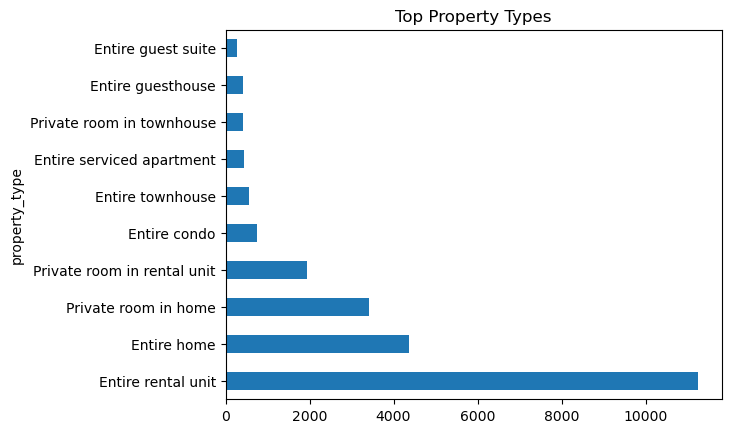

In [ ]:
#categorical analysis
listing['property_type'].value_counts().head(10).plot(kind='barh', title='Top Property Types')

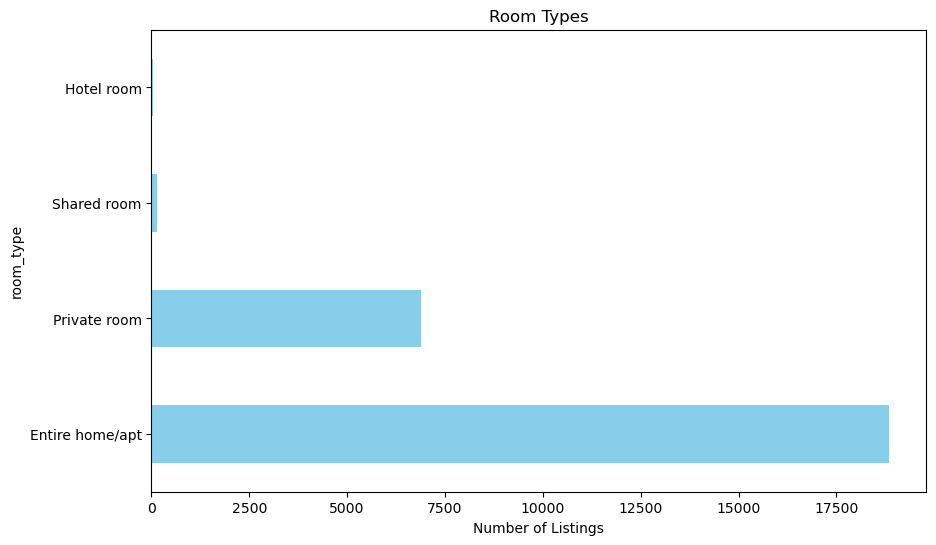

In [43]:
room_counts = listing['room_type'].value_counts()
plt.figure(figsize=(10, 6))
room_counts.plot(kind='barh', color='skyblue')
plt.xlabel("Number of Listings")
plt.title("Room Types")
plt.show()


<Axes: title={'center': 'Room Types'}, ylabel='count'>

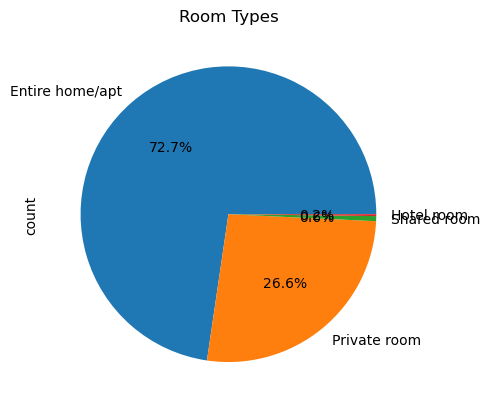

In [45]:
listing['room_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Room Types')


In [37]:
# Changing the F and T inside host is superhost value into Yes and No 
listing.loc[listing['host_is_superhost'] == 'f','host_is_superhost'] = "No"
listing.loc[listing['host_is_superhost'] == 't','host_is_superhost'] = "Yes"

<Axes: title={'center': 'Superhost Distribution'}, xlabel='host_is_superhost'>

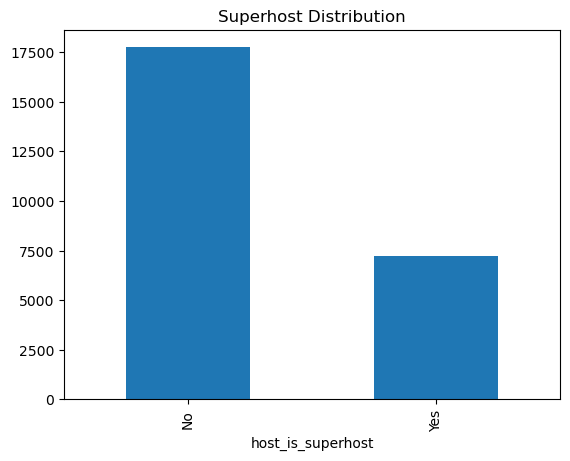

In [39]:
listing['host_is_superhost'].value_counts().plot(kind='bar', title='Superhost Distribution')

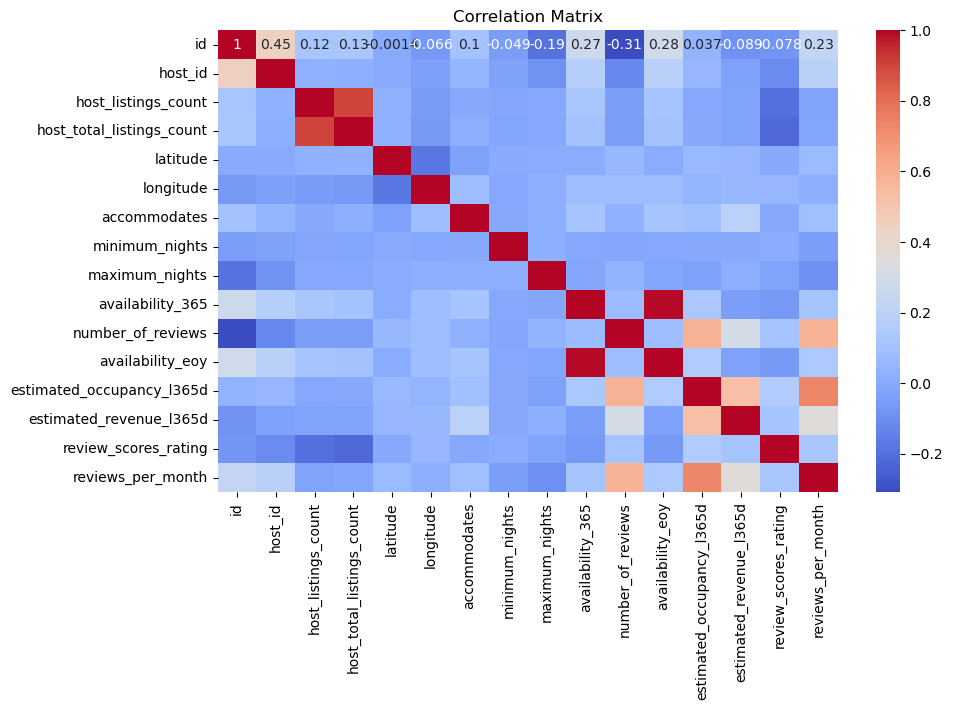

In [47]:
numeric_cols = listing.select_dtypes(include='number')
correlation = numeric_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Text(0.5, 1.0, 'Availability vs. Review Scores')

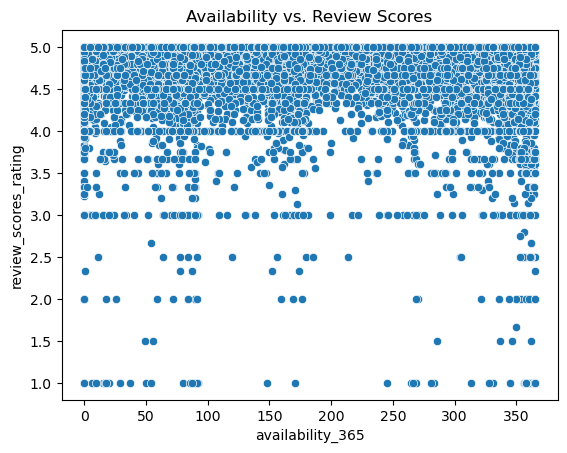

In [49]:
sns.scatterplot(x='availability_365', y='review_scores_rating', data=listing)
plt.title("Availability vs. Review Scores")

In [54]:
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

for _, row in listing.head(500).iterrows():  # sample first 500 for speed
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.4
    ).add_to(m)

m.save("melbourne_airbnb_preview.html")
m

In [55]:
listing.groupby('neighbourhood_cleansed').agg({
    'number_of_reviews': 'sum',
    'review_scores_rating': 'mean'
}).sort_values('number_of_reviews', ascending=False).head(10)


,number_of_reviews,review_scores_rating
neighbourhood_cleansed,,
Melbourne,367847,4.655220
Port Phillip,91154,4.773577
Yarra Ranges,87663,4.844275
Yarra,78529,4.801642
Stonnington,43559,4.766805
Moreland,27904,4.720369
Maribyrnong,19095,4.756959
Darebin,15954,4.791691
Boroondara,14138,4.736842


Text(0.5, 1.0, 'Review Score by Room Type')

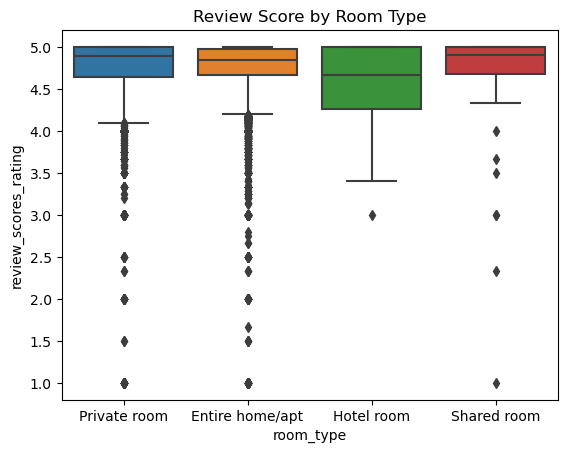

In [60]:
sns.boxplot(x='room_type', y='review_scores_rating', data=listing)
plt.title("Review Score by Room Type")

(0.0, 100.0)

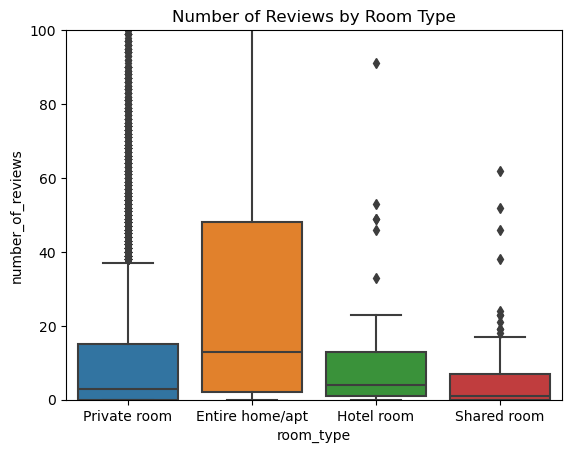

In [61]:
sns.boxplot(x='room_type', y='number_of_reviews', data=listing)
plt.title("Number of Reviews by Room Type")
plt.ylim(0, 100)  # Adjust as needed

In [62]:
property_counts = listing['property_type'].value_counts()
listing['property_grouped'] = listing['property_type'].apply(lambda x: x if property_counts[x] >= 100 else 'Other')
grouped = listing['property_grouped'].value_counts()

import plotly.express as px
fig = px.pie(names=grouped.index, values=grouped.values, hole=0.4,
             title='Property Type Breakdown (Grouped)')
fig.update_traces(textinfo='percent+label')
fig.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.02, 'Pairwise Feature Relationships')

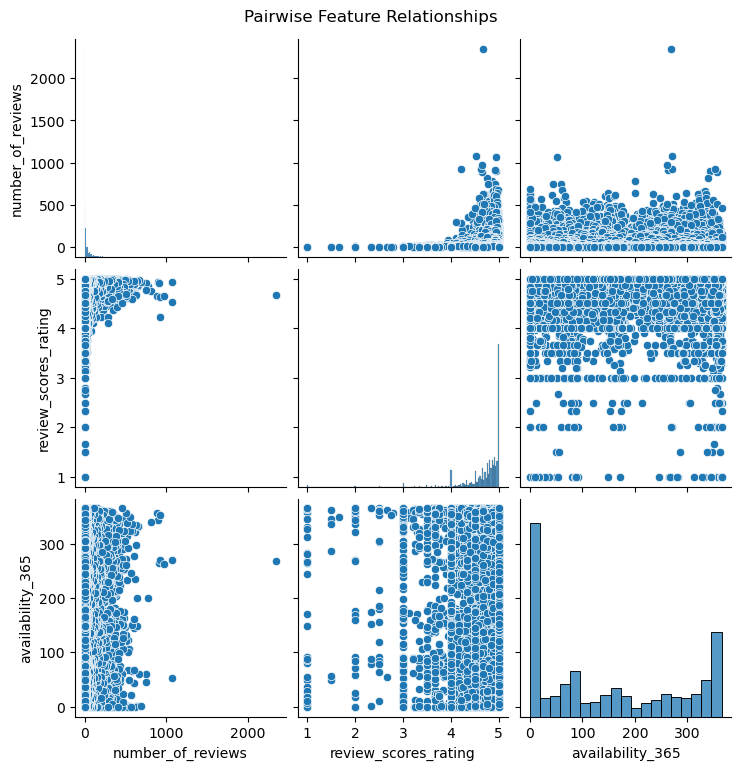

In [63]:
subset = listing[['price', 'number_of_reviews', 'review_scores_rating', 'availability_365']].copy()
sns.pairplot(subset)
plt.suptitle("Pairwise Feature Relationships", y=1.02)


<Axes: title={'center': 'Top 15 Suburbs by Listing Count'}, ylabel='neighbourhood_cleansed'>

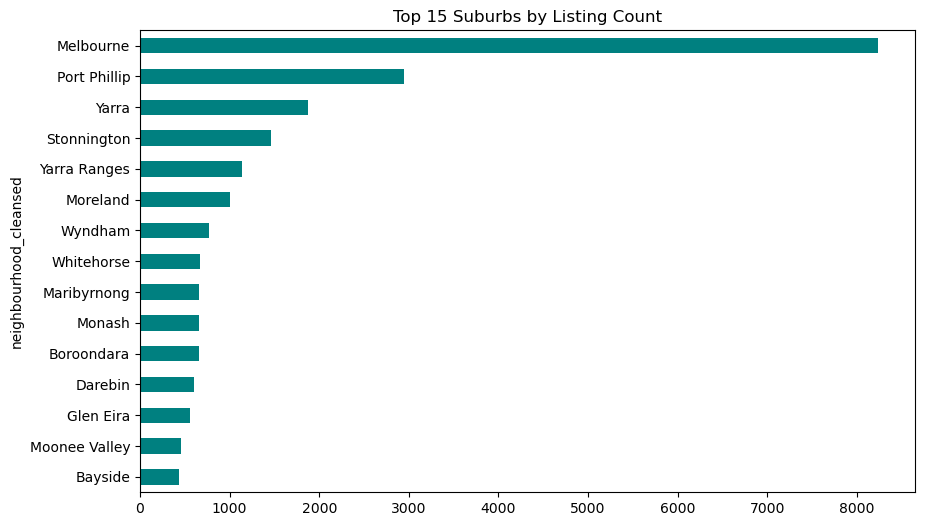

In [64]:
listing['neighbourhood_cleansed'].value_counts().head(15).sort_values().plot(
    kind='barh', color='teal', figsize=(10, 6), title="Top 15 Suburbs by Listing Count")


Text(0.5, 1.0, 'Superhost vs Availability')

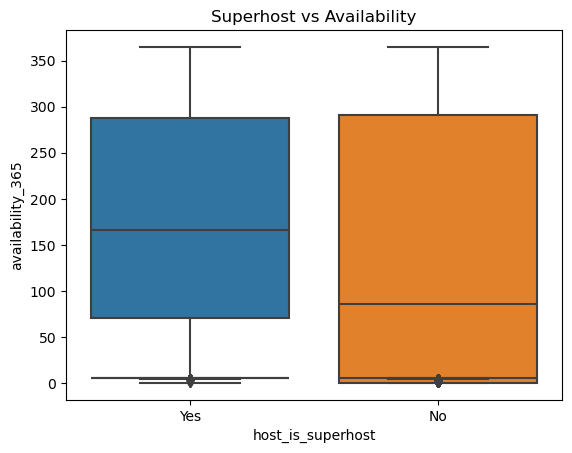

In [67]:
sns.boxplot(x='host_is_superhost', y='review_scores_rating', data=listing)
plt.title("Superhost vs Review Scores")

sns.boxplot(x='host_is_superhost', y='availability_365', data=listing)
plt.title("Superhost vs Availability")


In [70]:
import plotly.express as px

fig = px.scatter_mapbox(listing.sample(1000),
                        lat='latitude', lon='longitude',
                        color='price',
                        size='number_of_reviews',
                        hover_name='host_name',
                        mapbox_style="carto-positron",
                        zoom=11,
                        title="Airbnb Prices Across Melbourne")
fig.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 0, 'Price ($)')

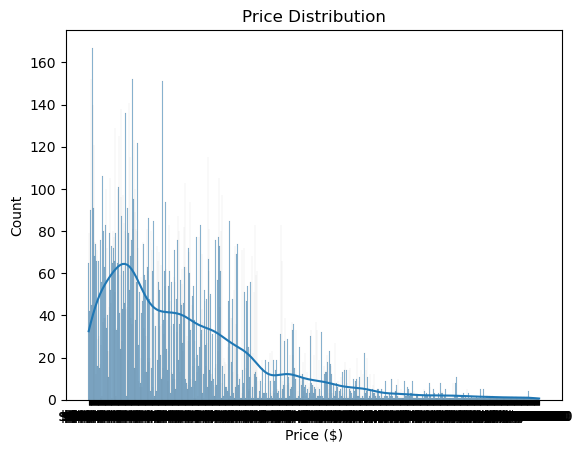

In [72]:
sns.histplot(listing['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price ($)")


Text(0.5, 1.0, 'Top 15 Rated Suburbs (Avg. Review Score)')

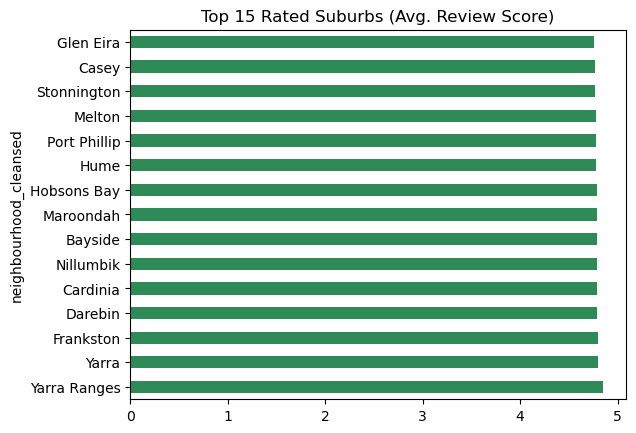

In [81]:
suburb_ratings = listing.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().sort_values(ascending=False).head(15)
suburb_ratings.plot(kind='barh', color='seagreen')
plt.title("Top 15 Rated Suburbs (Avg. Review Score)")


Text(0.5, 1.0, 'Top 15 Suburbs by Estimated Revenue')

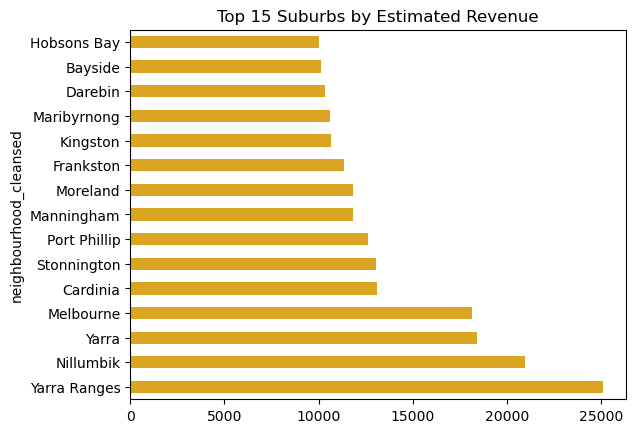

In [83]:
listing['est_revenue'] = listing['price'] * listing['availability_365']
revenue_by_suburb = listing.groupby('neighbourhood_cleansed')['estimated_revenue_l365d'].mean().sort_values(ascending=False).head(15)
revenue_by_suburb.plot(kind='barh', color='goldenrod')
plt.title("Top 15 Suburbs by Estimated Revenue")


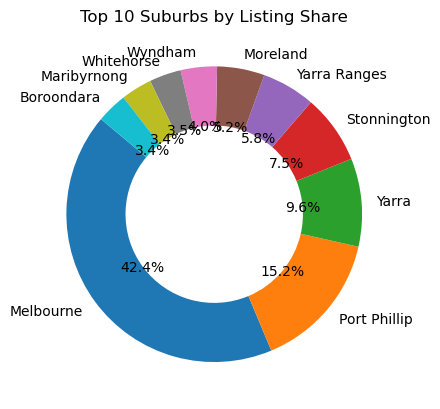

In [84]:
top10 = listing['neighbourhood_cleansed'].value_counts().head(10)
plt.pie(top10, labels=top10.index, startangle=140, autopct='%1.1f%%', wedgeprops=dict(width=0.4))
plt.title("Top 10 Suburbs by Listing Share")
plt.gca().set_aspect('equal')  # makes it a donut

Text(0, 0.5, 'Number of Listings')

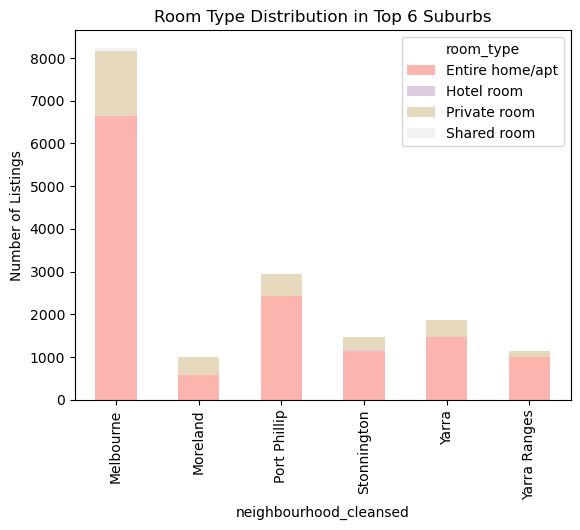

In [86]:
top_suburbs = listing['neighbourhood_cleansed'].value_counts().head(6).index
subset = listing[listing['neighbourhood_cleansed'].isin(top_suburbs)]

room_dist = pd.crosstab(subset['neighbourhood_cleansed'], subset['room_type'])
room_dist.plot(kind='bar', stacked=True, colormap='Pastel1')
plt.title("Room Type Distribution in Top 6 Suburbs")
plt.ylabel("Number of Listings")


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



Text(0.5, 1.0, 'Average Availability (Days) by Suburb & Room Type')

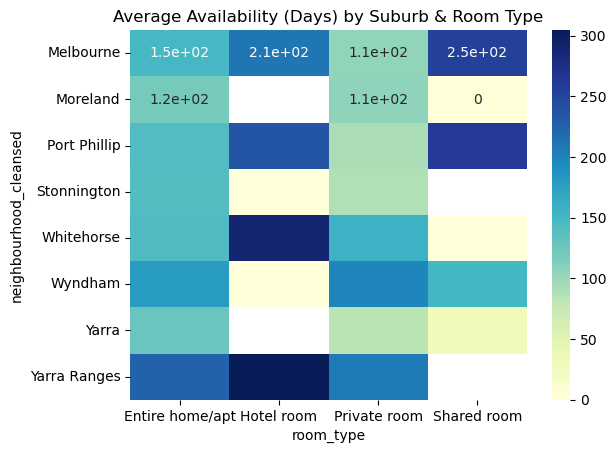

In [87]:
top_suburbs = listing['neighbourhood_cleansed'].value_counts().head(8).index
heat_df = listing[listing['neighbourhood_cleansed'].isin(top_suburbs)]
pivot = heat_df.pivot_table(index='neighbourhood_cleansed', columns='room_type', values='availability_365', aggfunc='mean')

sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title("Average Availability (Days) by Suburb & Room Type")


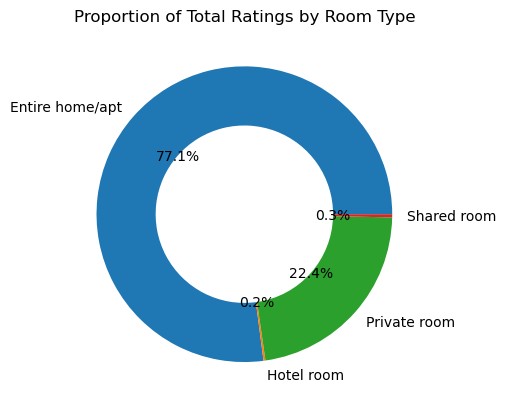

In [88]:
room_rating_sum = listing.groupby('room_type')['review_scores_rating'].sum()
plt.pie(room_rating_sum, labels=room_rating_sum.index, autopct='%1.1f%%', wedgeprops=dict(width=0.4))
plt.title("Proportion of Total Ratings by Room Type")
plt.gca().set_aspect('equal')

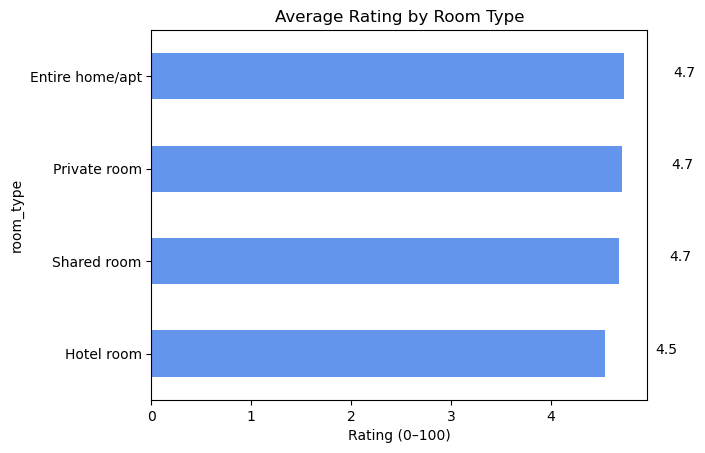

In [89]:
avg_rating = listing.groupby('room_type')['review_scores_rating'].mean().sort_values(ascending=False)

avg_rating.sort_values().plot(kind='barh', color='cornflowerblue')
plt.title("Average Rating by Room Type")
plt.xlabel("Rating (0–100)")

for index, value in enumerate(avg_rating.sort_values()):
    plt.text(value + 0.5, index, f'{value:.1f}')

Text(0.5, 1.0, 'Average Rating by Room Type (Radar View)')

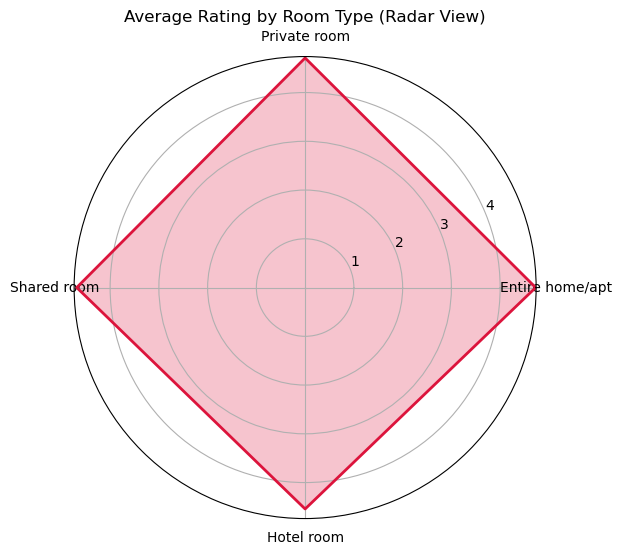

In [90]:
import numpy as np

labels = avg_rating.index.tolist()
values = avg_rating.values
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values = np.concatenate((values, [values[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, values, color='crimson', linewidth=2)
ax.fill(angles, values, color='crimson', alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title("Average Rating by Room Type (Radar View)")


In [93]:
listing_rating_filter = listing[listing['review_scores_rating'].notna()]
avg_rating = listing_rating_filter.groupby('room_type')['review_scores_rating'].mean().sort_values(ascending=False)


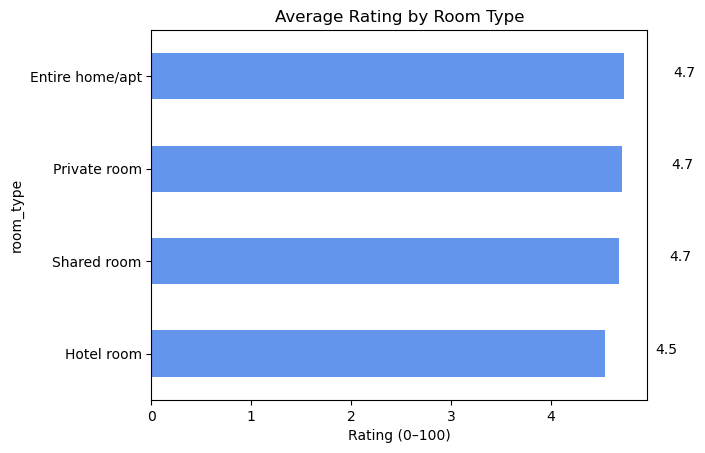

In [94]:
avg_rating.sort_values().plot(kind='barh', color='cornflowerblue')
plt.title("Average Rating by Room Type")
plt.xlabel("Rating (0–100)")

for index, value in enumerate(avg_rating.sort_values()):
    plt.text(value + 0.5, index, f'{value:.1f}')

In [96]:
missing_rating_count = listing['review_scores_rating'].isna().sum()
print(f"Missing ratings: {missing_rating_count} out of {len(listing)} listings ({missing_rating_count/len(listing):.1%})")


Missing ratings: 4857 out of 25946 listings (18.7%)


In [97]:
# Step 1: Filter the top suburbs (for cleaner plots)
top_suburbs = listing['neighbourhood_cleansed'].value_counts().head(10).index
subset = listing[listing['neighbourhood_cleansed'].isin(top_suburbs)]

# Step 2: Create cross-tab of room types per neighbourhood
room_percent = pd.crosstab(subset['neighbourhood_cleansed'], subset['room_type'], normalize='index') * 100

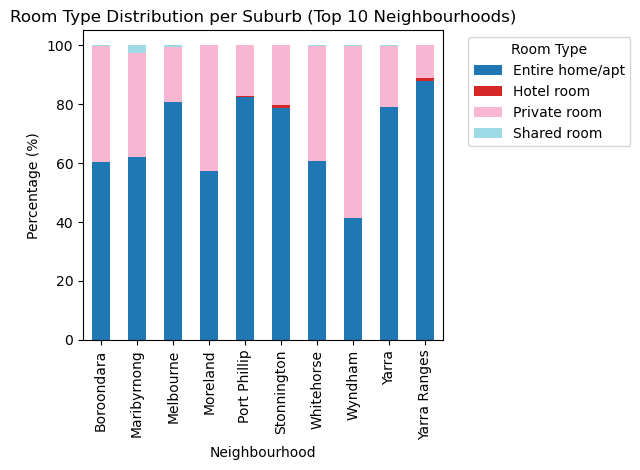

In [98]:
room_percent.plot(kind='bar', stacked=True, colormap='tab20')
plt.title("Room Type Distribution per Suburb (Top 10 Neighbourhoods)")
plt.ylabel("Percentage (%)")
plt.xlabel("Neighbourhood")
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

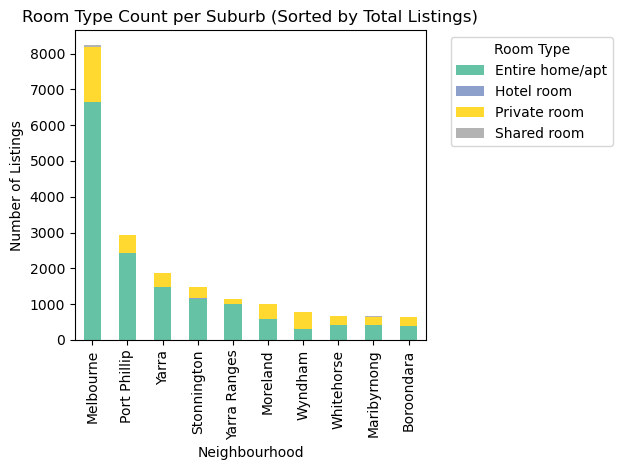

In [100]:
# Step 1: Crosstab (counts of room types per neighbourhood)
room_count = pd.crosstab(subset['neighbourhood_cleansed'], subset['room_type'])

# Step 2: Sort by total listings per suburb
room_count['Total'] = room_count.sum(axis=1)
room_count_sorted = room_count.sort_values('Total', ascending=False).drop(columns='Total')

# Step 3: Plot
room_count_sorted.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Room Type Count per Suburb (Sorted by Total Listings)")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Listings")
plt.legend(title="Room Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


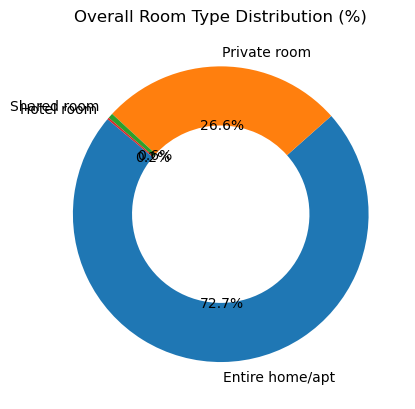

In [101]:
room_type_counts = listing['room_type'].value_counts()

# Donut chart
plt.pie(room_type_counts, labels=room_type_counts.index, 
        autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.title("Overall Room Type Distribution (%)")
plt.gca().set_aspect('equal')  # Keep it circular


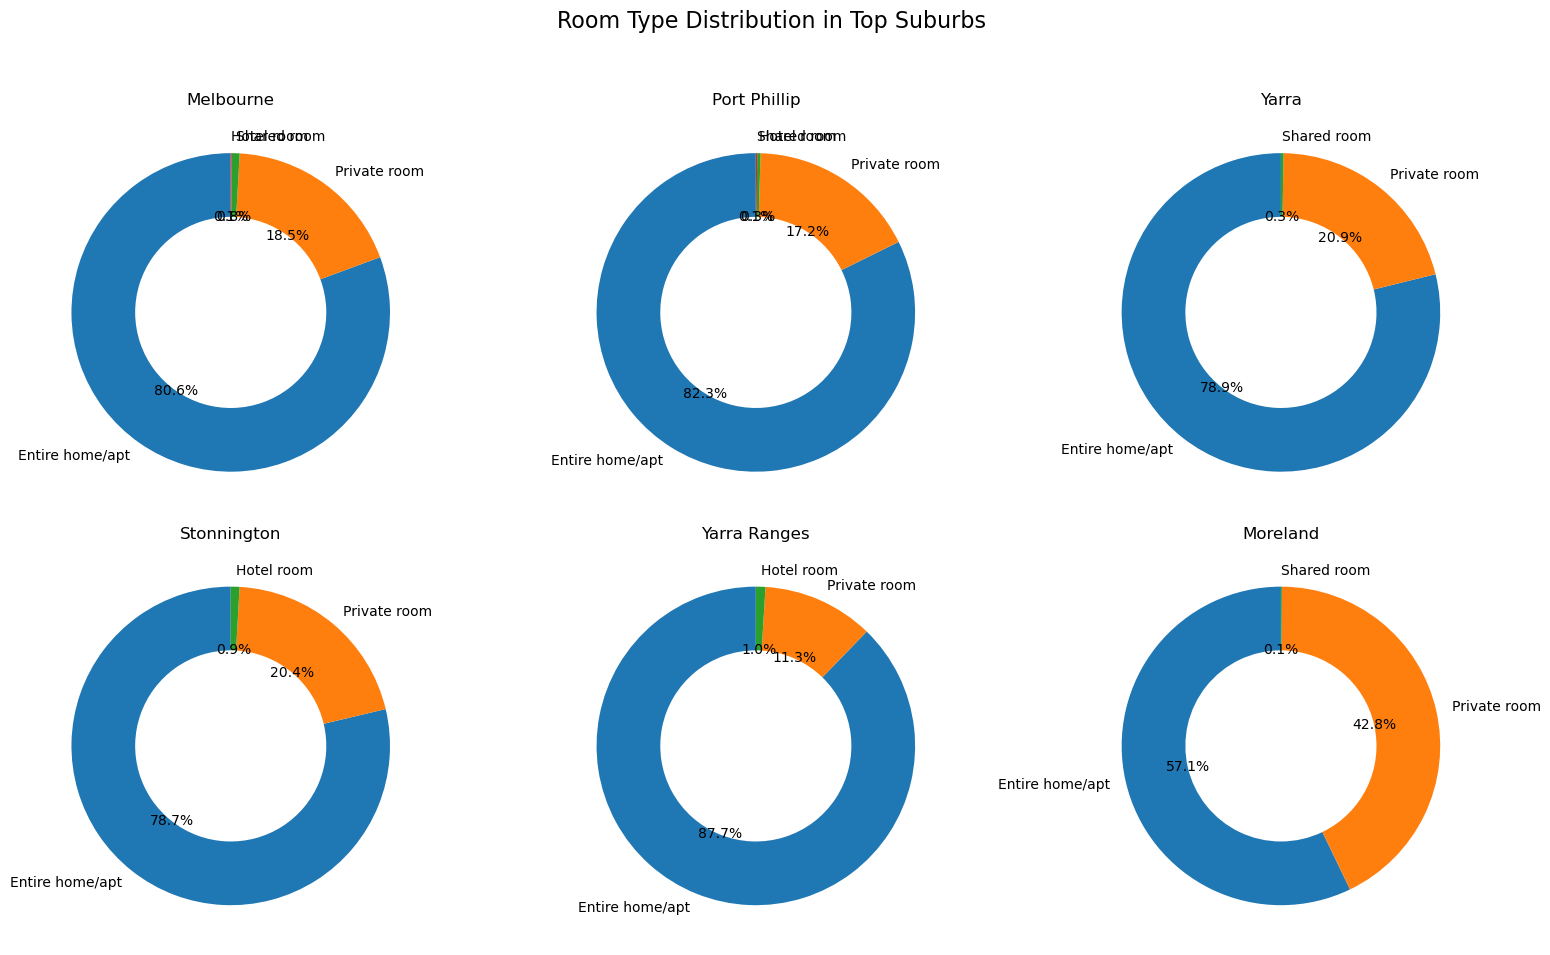

In [109]:

# Get top 5 or 6 suburbs (keep it small for readability)
top_suburbs = listing['neighbourhood_cleansed'].value_counts().head(6).index

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))  # 2 rows, 3 columns
axes = axes.flatten()

# Loop through each suburb
for i, suburb in enumerate(top_suburbs):
    suburb_data = listing[listing['neighbourhood_cleansed'] == suburb]
    room_counts = suburb_data['room_type'].value_counts()
    
    # Donut chart
    axes[i].pie(room_counts, labels=room_counts.index, 
                autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
    axes[i].set_title(f"{suburb}")

# Adjust layout
plt.suptitle("Room Type Distribution in Top Suburbs", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [111]:
listing['price'] = listing['price'].replace('[\$,]', '', regex=True).astype(float)


In [112]:
# Clean & prepare
listing['revenue_est'] = listing['price'] * listing['availability_365']  # Rough estimate of annual revenue

# Group by neighbourhood
summary = listing.groupby('neighbourhood_cleansed').agg({
    'review_scores_rating': 'mean',
    'revenue_est': 'mean',
    'id': 'count'  # optional: number of listings
}).rename(columns={
    'review_scores_rating': 'avg_rating',
    'revenue_est': 'avg_revenue',
    'id': 'listing_count'
}).dropna()


In [114]:
top5_rating = summary.sort_values('avg_rating', ascending=False).head(5)
bottom5_rating = summary.sort_values('avg_rating').head(5)

# Top 5 & bottom 5 by revenue
top5_revenue = summary.sort_values('avg_revenue', ascending=False).head(5)
bottom5_revenue = summary.sort_values('avg_revenue').head(5)


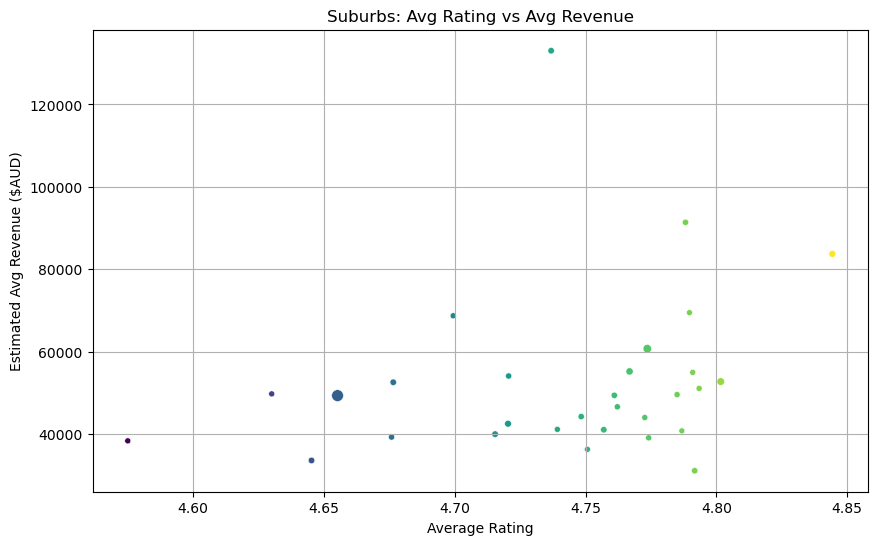

In [116]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=summary, x='avg_rating', y='avg_revenue', size='listing_count', hue='avg_rating', palette='viridis', legend=False)

plt.title("Suburbs: Avg Rating vs Avg Revenue")
plt.xlabel("Average Rating")
plt.ylabel("Estimated Avg Revenue ($AUD)")
plt.grid(True)


### Number of avaialble room to stay and the rating of each suburbs

In [117]:
# Count number of listings per suburb
listing_counts = listing['neighbourhood_cleansed'].value_counts()

# Top and bottom 5 suburbs by count
top5_suburbs = listing_counts.head(5).index
bottom5_suburbs = listing_counts.tail(5).index

In [120]:
# Function to extract min/max rating per suburb
def get_rating_range(listing, suburbs):
    return listing[listing['neighbourhood_cleansed'].isin(suburbs)].groupby('neighbourhood_cleansed')['review_scores_rating'].agg(['min', 'max', 'count']).dropna()


In [121]:
top5_ratings = get_rating_range(listing, top5_suburbs)
bottom5_ratings = get_rating_range(listing, bottom5_suburbs)


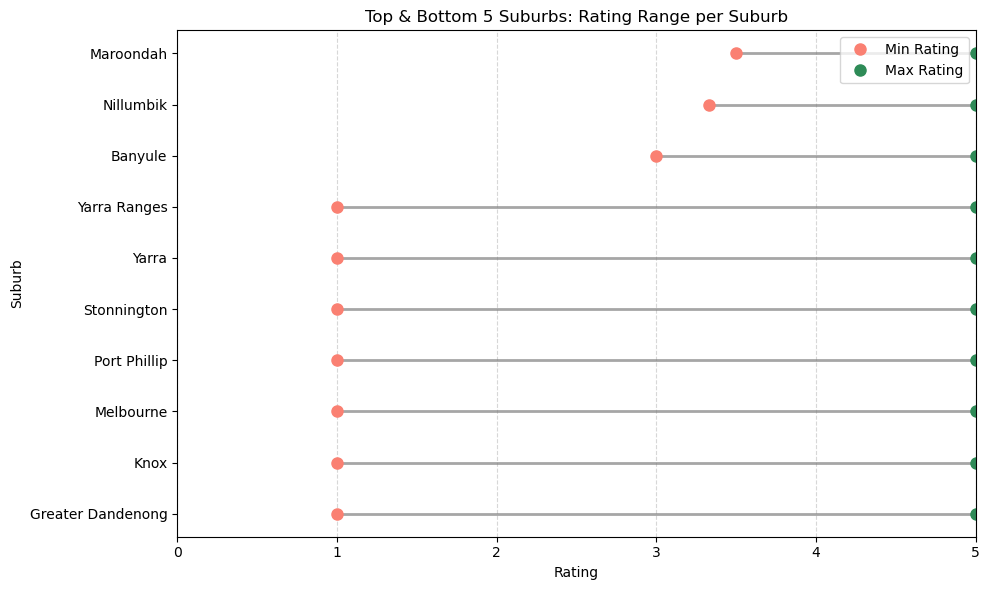

In [124]:
# Combine for visual
combined_ratings = pd.concat([bottom5_ratings, top5_ratings])
combined_ratings = combined_ratings.sort_values('min')

# Plot
plt.figure(figsize=(10, 6))

# Horizontal lines = rating range
plt.hlines(y=combined_ratings.index, xmin=combined_ratings['min'], xmax=combined_ratings['max'], color='gray', alpha=0.7, linewidth=2)

# Dots at min and max
plt.plot(combined_ratings['min'], combined_ratings.index, "o", label='Min Rating', color='salmon', markersize=8)
plt.plot(combined_ratings['max'], combined_ratings.index, "o", label='Max Rating', color='seagreen', markersize=8)

plt.title("Top & Bottom 5 Suburbs: Rating Range per Suburb")
plt.xlabel("Rating")
plt.ylabel("Suburb")
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
